In [2]:
%env CONDA_PREFIX

'C:\\ProgramData\\Anaconda3\\envs\\tensorflow'

In [2]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. 폐암환자 생존율 예측

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = np.loadtxt("ThoracicSurgery.csv", delimiter=',')


In [3]:
model = Sequential()
model.add(Dense(units=30, input_dim=17, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=10, verbose=1)

In [ ]:
model.evaluate(X, Y)

In [ ]:
print('Accuracy: ', model.evaluate(X, Y)[1] )

In [ ]:
test_data = np.array([[172,2,2.88,2.2,0,0,0,0,0,0,12,1,0,0,1,0,62]])

In [ ]:
print('result: ', model.predict(test_data))

In [ ]:
print('result: %.2f'%model.predict(test_data))

In [ ]:
test_data = np.array([[150,2,2.88,2.2,0,0,0,0,0,0,12,1,0,0,1,0,59]])
print('result: %.2f'%model.predict(test_data))

# 2. 피마 인디언 당뇨병 예측

In [5]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv', 
                names=['pregnant', 'plasma', 'pressure', 'thickness', 
                       'insulin', 'BMI', 'pedigree', 'age', 'class' ])

In [6]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df[df['class']==0].describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [9]:
df[df['class']==1].describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


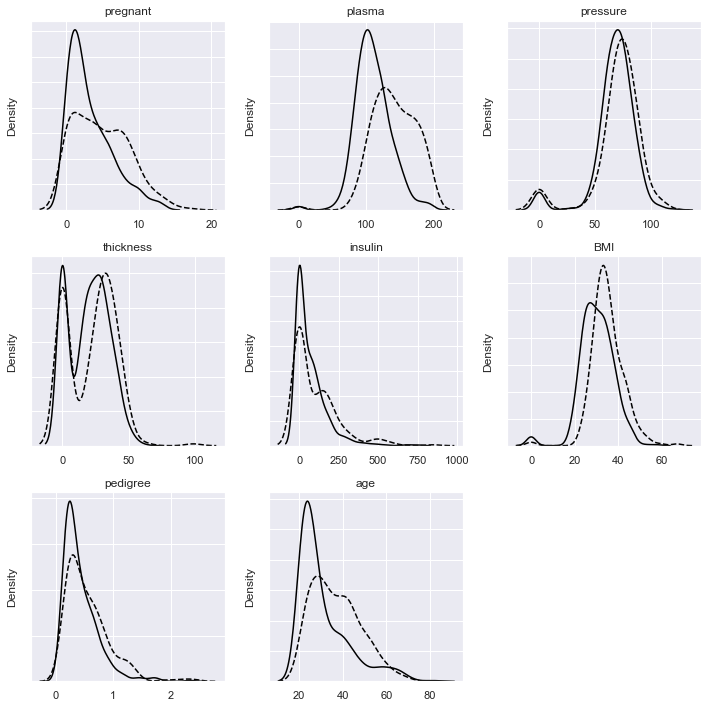

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.subplots(3,3, figsize=(10,10) )
for idx, col in enumerate(df.columns[:-1]):
    ax = plt.subplot(3,3, idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df[df['class']==0][col], hist=False, axlabel=False,
               kde_kws={'linestyle':'-', 'color':'black', 'label':'No Diabetes'})
    sns.distplot(df[df['class']==1][col], hist=False, axlabel=False,
               kde_kws={'linestyle':'--', 'color':'black', 'label':'Diabetes'})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

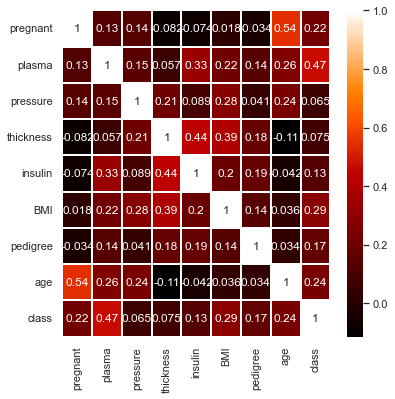

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap( df.corr(), linewidths=0.1, linecolor='white',
            cmap=plt.cm.gist_heat, annot=True)
plt.show()

In [16]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [17]:
d1 = df[['pregnant', 'class']].groupby(['pregnant'],as_index=False)
d1.mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


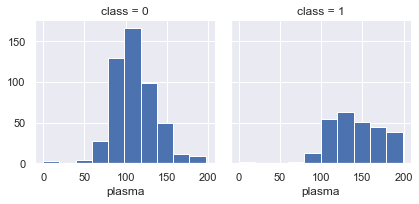

In [18]:
grid=sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [19]:
df.shape

(768, 9)

In [20]:
X = df.values[:, :-1]
Y = df.values[:, [-1]]
X.shape, Y.shape

((768, 8), (768, 1))

In [21]:
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=12, input_dim=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=1000, batch_size=10, verbose=0)
print("Accuracy:", model.evaluate(X, Y)[1])

24/24 [==============================] - 0s 896us/step - loss: 0.4315 - accuracy: 0.8047
Accuracy: 0.8046875


In [22]:
Y_pred = model.predict(X)
Y_pred = (Y_pred >= 0.5).astype(int)

In [23]:
print((Y_pred==Y.astype(int)).reshape(-1,).astype(int))

[1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 

In [24]:
np.nonzero((Y_pred==Y.astype(int)).reshape(-1,).astype(int))

(array([  0,   1,   2,   3,   4,   5,   8,  10,  11,  12,  13,  14,  18,
         21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  35,
         37,  38,  39,  42,  43,  45,  47,  48,  49,  50,  51,  52,  53,
         55,  56,  57,  59,  60,  61,  62,  64,  65,  68,  69,  72,  73,
         74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,
         88,  89,  90,  91,  92,  94,  96,  97,  98,  99, 100, 102, 103,
        104, 105, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 142, 145, 146, 147, 148, 149,
        151, 152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 168,
        169, 171, 172, 173, 174, 175, 176, 177, 179, 180, 182, 183, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200,
        202, 203, 205, 206, 207, 208, 209, 210, 213, 214, 215, 219, 220,
        221, 222, 224, 225, 226, 227, 229, 230, 231

In [25]:
np.nonzero((Y_pred==Y.astype(int)).reshape(-1,).astype(int))[0]

array([  0,   1,   2,   3,   4,   5,   8,  10,  11,  12,  13,  14,  18,
        21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  35,
        37,  38,  39,  42,  43,  45,  47,  48,  49,  50,  51,  52,  53,
        55,  56,  57,  59,  60,  61,  62,  64,  65,  68,  69,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,
        88,  89,  90,  91,  92,  94,  96,  97,  98,  99, 100, 102, 103,
       104, 105, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 142, 145, 146, 147, 148, 149,
       151, 152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 168,
       169, 171, 172, 173, 174, 175, 176, 177, 179, 180, 182, 183, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200,
       202, 203, 205, 206, 207, 208, 209, 210, 213, 214, 215, 219, 220,
       221, 222, 224, 225, 226, 227, 229, 230, 231, 232, 234, 23

In [27]:
np.where((Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)

(array([  6,   7,   9,  15,  16,  17,  19,  20,  23,  34,  36,  40,  41,
         44,  46,  54,  58,  63,  66,  67,  70,  71,  86,  93,  95, 101,
        107, 109, 124, 128, 141, 143, 144, 150, 153, 160, 165, 166, 167,
        170, 178, 181, 184, 197, 198, 201, 204, 211, 212, 216, 217, 218,
        223, 228, 233, 244, 246, 247, 248, 255, 258, 260, 267, 276, 281,
        284, 285, 286, 287, 291, 295, 304, 308, 309, 321, 322, 326, 327,
        328, 330, 335, 343, 351, 364, 366, 374, 395, 397, 400, 402, 412,
        414, 419, 429, 436, 437, 443, 444, 448, 451, 468, 469, 470, 473,
        476, 485, 486, 487, 489, 499, 510, 517, 519, 531, 541, 549, 555,
        558, 568, 569, 574, 578, 580, 594, 608, 622, 628, 630, 635, 638,
        641, 645, 657, 658, 659, 660, 666, 668, 670, 699, 706, 709, 710,
        719, 725, 730, 731, 744, 756, 763], dtype=int64),)

In [28]:
np.where((Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)[0]

array([  6,   7,   9,  15,  16,  17,  19,  20,  23,  34,  36,  40,  41,
        44,  46,  54,  58,  63,  66,  67,  70,  71,  86,  93,  95, 101,
       107, 109, 124, 128, 141, 143, 144, 150, 153, 160, 165, 166, 167,
       170, 178, 181, 184, 197, 198, 201, 204, 211, 212, 216, 217, 218,
       223, 228, 233, 244, 246, 247, 248, 255, 258, 260, 267, 276, 281,
       284, 285, 286, 287, 291, 295, 304, 308, 309, 321, 322, 326, 327,
       328, 330, 335, 343, 351, 364, 366, 374, 395, 397, 400, 402, 412,
       414, 419, 429, 436, 437, 443, 444, 448, 451, 468, 469, 470, 473,
       476, 485, 486, 487, 489, 499, 510, 517, 519, 531, 541, 549, 555,
       558, 568, 569, 574, 578, 580, 594, 608, 622, 628, 630, 635, 638,
       641, 645, 657, 658, 659, 660, 666, 668, 670, 699, 706, 709, 710,
       719, 725, 730, 731, 744, 756, 763], dtype=int64)

In [29]:
inc_idx = np.where((Y_pred==Y.astype(int)).reshape(-1,).astype(int)==0)[0]
inc_idx.shape

(150,)

In [30]:
df.iloc[inc_idx]

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
15,7,100,0,0,0,30.0,0.484,32,1
16,0,118,84,47,230,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
730,3,130,78,23,79,28.4,0.323,34,1
731,8,120,86,0,0,28.4,0.259,22,1
744,13,153,88,37,140,40.6,1.174,39,0
756,7,137,90,41,0,32.0,0.391,39,0


In [31]:
wrong_df = df.iloc[inc_idx]
wrong_df[wrong_df['class']==1].describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,3.728814,113.033898,69.169492,21.610169,65.796610,31.711864,0.487034,32.118644,1.0
std,3.372457,15.639215,18.625300,15.731603,78.527346,7.738085,0.298467,10.036287,0.0
min,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.127000,21.000000,1.0
25%,1.000000,104.000000,64.000000,0.000000,0.000000,29.300000,0.256500,25.000000,1.0
50%,3.000000,113.000000,72.000000,25.000000,0.000000,32.400000,0.378000,30.000000,1.0
75%,6.000000,124.000000,80.000000,32.000000,124.500000,34.700000,0.685000,35.500000,1.0
max,13.000000,151.000000,96.000000,47.000000,250.000000,45.800000,1.391000,70.000000,1.0


In [32]:
wrong_df[wrong_df['class']==1]

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
6,3,78,50,32,88,31.0,0.248,26,1
9,8,125,96,0,0,0.0,0.232,54,1
15,7,100,0,0,0,30.0,0.484,32,1
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
19,1,115,70,30,96,34.6,0.529,32,1
23,9,119,80,35,0,29.0,0.263,29,1
66,0,109,88,30,0,32.5,0.855,38,1
70,2,100,66,20,90,32.9,0.867,28,1
93,4,134,72,0,0,23.8,0.277,60,1


In [33]:
wrong_df[wrong_df['class']==0].describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0
mean,4.901099,141.021978,74.197802,22.461538,130.417582,34.726374,0.528286,36.098901,0.0
std,3.409317,22.485540,13.651390,17.686974,167.184134,6.407198,0.399453,11.141569,0.0
min,0.000000,98.000000,0.000000,0.000000,0.000000,19.600000,0.126000,21.000000,0.0
25%,2.000000,124.500000,68.000000,0.000000,0.000000,29.800000,0.255500,27.000000,0.0
50%,4.000000,141.000000,74.000000,28.000000,70.000000,34.700000,0.394000,35.000000,0.0
75%,7.000000,153.000000,82.000000,36.000000,209.500000,39.400000,0.689500,42.000000,0.0
max,13.000000,197.000000,110.000000,54.000000,744.000000,52.300000,2.329000,67.000000,0.0


## 혼동행렬
- https://towardsdatascience.com/decoding-the-confusion-matrix-bb4801decbb

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Y_pred)
cm

array([[409,  91],
       [ 59, 209]], dtype=int64)

In [42]:
TN, FP, FN, TP = cm.flatten()
print(TN, FP, FN, TP)

409 91 59 209


In [43]:
# 정확도
accuracy = (TN+TP) / (TN + FP + FN + TP)
print(accuracy)

0.8046875


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_pred)

0.8046875

In [45]:
# 오류율
(FP + FN) / (TN + FP + FN + TP)


0.1953125

In [46]:
# 정밀도
precision = TP / (TP+FP)
precision

0.6966666666666667

In [47]:
from sklearn.metrics import precision_score
precision_score(Y, Y_pred)

0.6966666666666667

In [48]:
# 재현율
recall = TP / (FN+TP)
recall

0.7798507462686567

In [49]:
from sklearn.metrics import recall_score
recall_score(Y, Y_pred)

0.7798507462686567

In [50]:
# f1 score
F1 = 2*(precision*recall) / (precision+recall)
F1

0.7359154929577465

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       500
         1.0       0.70      0.78      0.74       268

    accuracy                           0.80       768
   macro avg       0.79      0.80      0.79       768
weighted avg       0.81      0.80      0.81       768



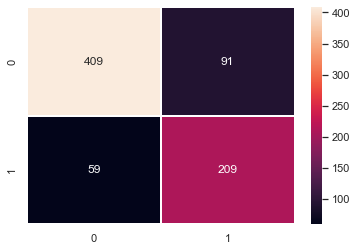

In [52]:
sns.heatmap(cm, linewidths=0.1, linecolor='white',
           annot=True, fmt='d')
plt.show()

# 3. Iris 품종 분류

In [53]:
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 
                                          'petal_length', 'petal_width', 
                                          'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


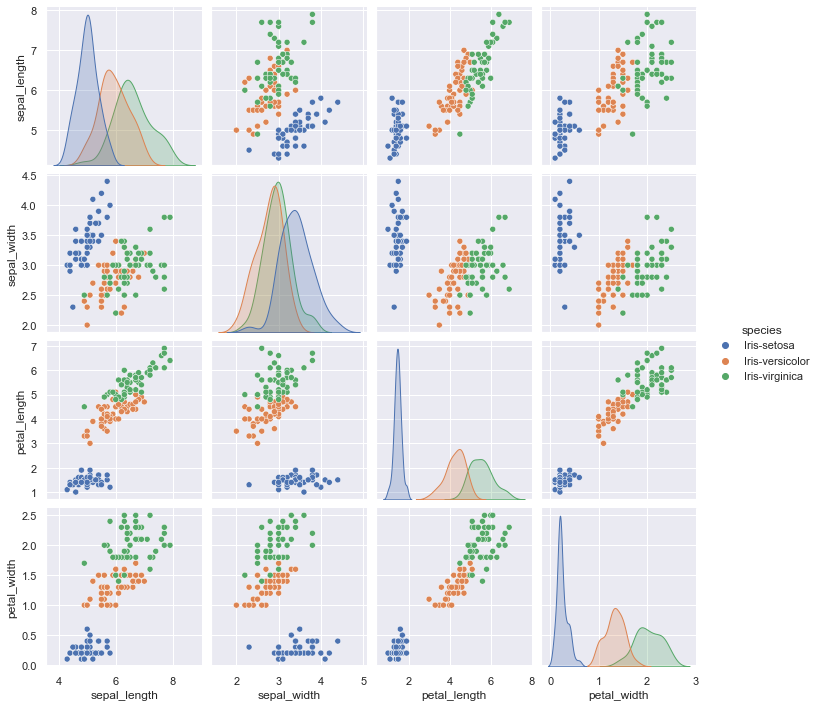

In [54]:
sns.pairplot(df, hue='species')
plt.show()

In [55]:
g = df.groupby(['species'], as_index=False)
for key, d in g:
    print('key:', key)
    print(d)
    print()

key: Iris-setosa
    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13 

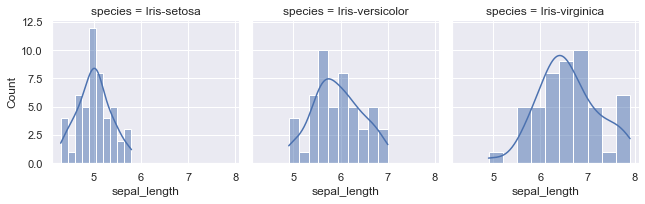

In [56]:
g = sns.FacetGrid(df, col='species')
g.map_dataframe(sns.histplot, kde=True,
               x = 'sepal_length', bins=10)
plt.show()

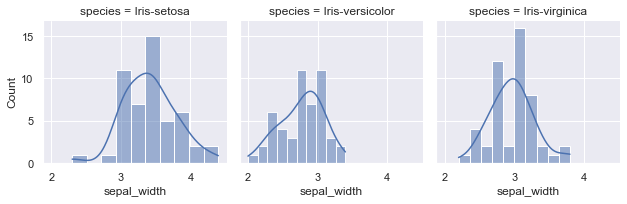

In [57]:
g = sns.FacetGrid(df, col='species')
g.map_dataframe(sns.histplot, kde=True,
               x = 'sepal_width', bins=10)
plt.show()

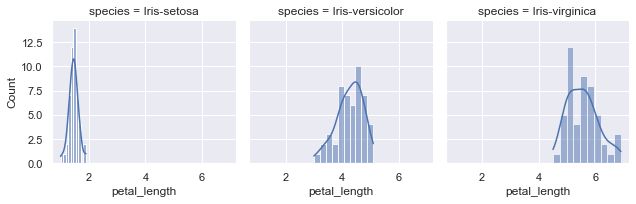

In [58]:
g = sns.FacetGrid(df, col='species')
g.map_dataframe(sns.histplot, kde=True,
               x = 'petal_length', bins=10)
plt.show()

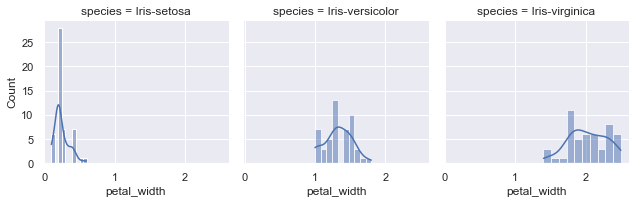

In [59]:
g = sns.FacetGrid(df, col='species')
g.map_dataframe(sns.histplot, kde=True,
               x = 'petal_width', bins=10)
plt.show()

In [60]:
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:, -1]
Y_str.shape

(150,)

In [61]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_str)
Y_num = e.transform(Y_str)
Y_num.shape

(150,)

In [62]:
e.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [63]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y_num, num_classes=3)
Y.shape

(150, 3)

In [64]:
%%time

model = Sequential()
model.add(Dense(units=16, input_dim=4, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X, Y, epochs=500, batch_size=32, verbose=0)
print('Accuracy:', model.evaluate(X, Y)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9733
Accuracy: 0.9733333587646484
Wall time: 4.16 s


# 4. 광물 예측

## 데이터 확인

In [65]:
df = pd.read_csv('sonar.csv', header=None )
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

[175, 74, 207, 26, 59, 14, 49, 135, 160, 99, 180, 91, 66, 36, 63, 170, 168, 11, 127, 166, 185, 190, 171, 103, 24]


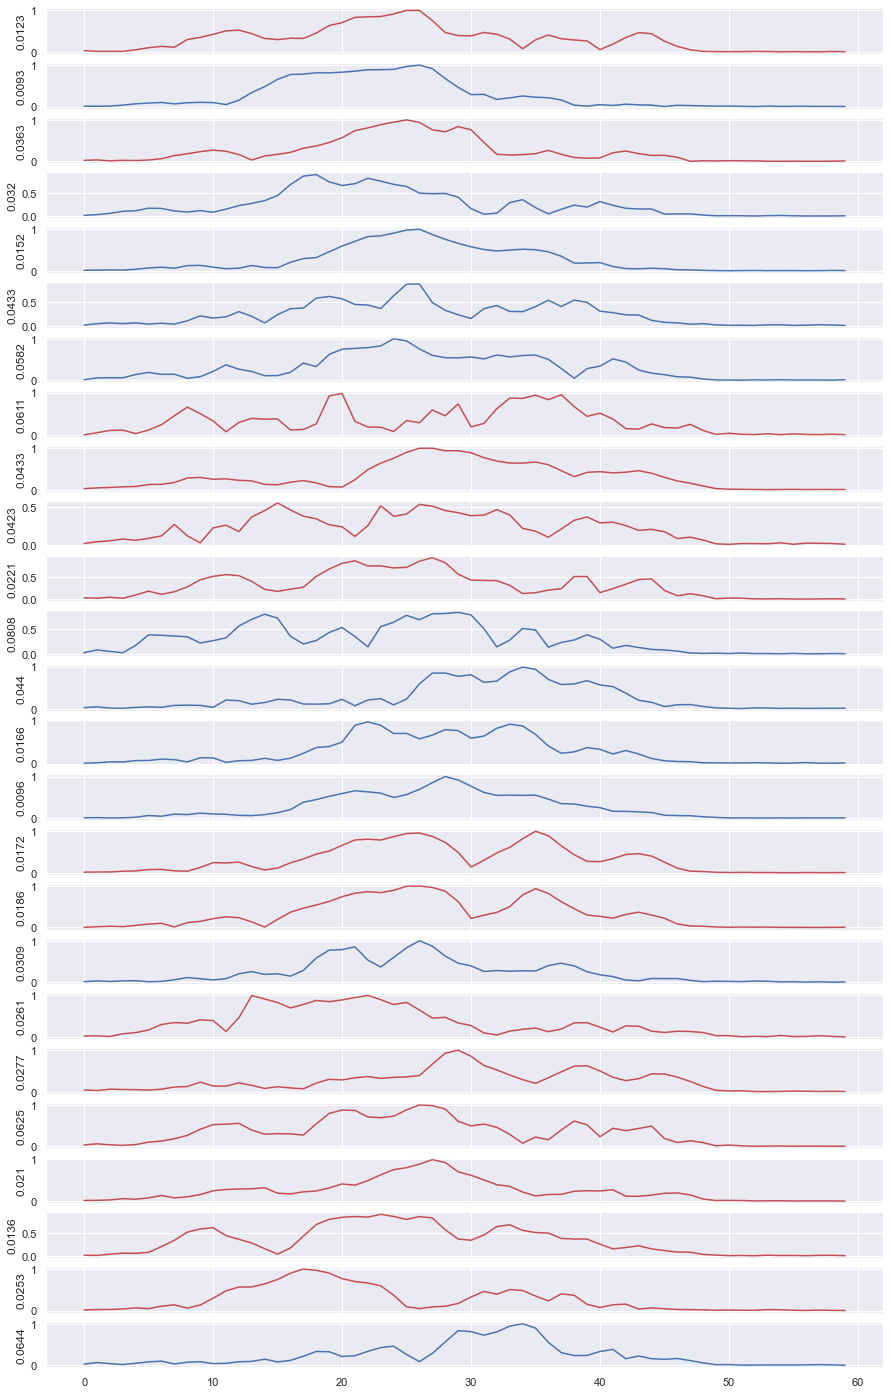

In [66]:
import random
samples = 25
d = random.sample(range(len(df)), samples)
print(d)

def set_color(x):
    return 'r' if x=='M' else 'b'

plt.figure(figsize=(15, samples))
for i in range(samples):
    plt.subplot(samples, 1, i+1)
    plt.plot(df.to_numpy()[d[i],:-1],
             set_color(df.to_numpy()[d[i], -1]))
    plt.ylabel(df.to_numpy()[d[i],1])
plt.show()

In [67]:
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:, -1]


In [68]:
from sklearn.preprocessing import LabelEncoder
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:, -1]
e = LabelEncoder()
e.fit(Y_str)
Y = e.transform(Y_str)

In [69]:
Y, Y.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (208,))

In [70]:
Y = Y.reshape(-1, 1)
Y.shape

(208, 1)

## 4.1 전체 자료 학습

In [71]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=24, input_dim=60, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X, Y, epochs=2000, batch_size=32, verbose=0)
print('Accuracy: %.4f'% model.evaluate(X, Y)[1])

7/7 [==============================] - 0s 2ms/step - loss: 3.6107e-06 - accuracy: 1.0000
Accuracy: 1.0000


## 4.2 학습 셋 및 테스트셋 분리 (과적합 확인)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)


In [73]:
X.shape, Y.shape

((208, 60), (208, 1))

In [74]:
model = Sequential()
model.add(Dense(units=24, input_dim=60, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10000, batch_size=32, verbose=0)
print('Accuracy: %.4f'% model.evaluate(X_train, Y_train)[1])

5/5 [==============================] - 0s 2ms/step - loss: 4.2882e-09 - accuracy: 1.0000
Accuracy: 1.0000


In [75]:
print('Test accuracy: %.4f'%(model.evaluate(X_test, Y_test)[1]))

2/2 [==============================] - 0s 4ms/step - loss: 3.2087 - accuracy: 0.8413
Test accuracy: 0.8413


In [76]:
model.save('sonar_model.h5')

In [77]:
from tensorflow.keras.models import load_model

del model
model = load_model('sonar_model.h5')

print('Training accuracy: %.4f'%(model.evaluate(X_train, Y_train)[1]))
print('Test accuracy: %.4f'%(model.evaluate(X_test, Y_test)[1]))

5/5 [==============================] - 0s 2ms/step - loss: 4.2882e-09 - accuracy: 1.0000
Training accuracy: 1.0000
2/2 [==============================] - 0s 3ms/step - loss: 3.2087 - accuracy: 0.8413
Test accuracy: 0.8413


## 4.3 교차 검증

In [79]:
from sklearn.model_selection import StratifiedKFold

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

n_fold=10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True,
                     random_state=seed)

In [80]:
type(skf)

sklearn.model_selection._split.StratifiedKFold

In [81]:
accuracy_list = []
for train_index, test_index in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(units=24, input_dim=60, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model.fit(X_train, Y_train, epochs=100, batch_size=5, verbose=1)
    accuracy_list.append(model.evaluate(X_test, Y_test)[1])

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6471
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6898
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7219
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7273
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7594
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7914
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.8128
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.8182
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8128
Epoch 11/

38/38 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8877
Epoch 64/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.8877
Epoch 65/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.8984
Epoch 66/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8930
Epoch 67/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9037
Epoch 68/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9198
Epoch 69/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9091
Epoch 70/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.8824
Epoch 71/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9091
Epoch 72/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9037
Epoch 73/100


38/38 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8342
Epoch 17/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8396
Epoch 18/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8663
Epoch 19/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8396
Epoch 20/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8182
Epoch 21/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8503
Epoch 22/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8449
Epoch 23/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8503
Epoch 24/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8610
Epoch 25/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8610
Epoch 26/100


38/38 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 1.0000
Epoch 99/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 261ms/step - loss: 0.1754 - accuracy: 0.9048
Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.4439
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5775
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6631
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.7273
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6631
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7861
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7540
Epoch 8/100
38/38 [

38/38 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9198
Epoch 52/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9358
Epoch 53/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9412
Epoch 54/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9251
Epoch 55/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9198
Epoch 56/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9626
Epoch 57/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9358
Epoch 58/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9465
Epoch 59/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9465
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9412
Epoch 61/100


38/38 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8075
Epoch 13/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8021
Epoch 14/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8449
Epoch 15/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8503
Epoch 16/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8342
Epoch 17/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8235
Epoch 18/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8342
Epoch 19/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8075
Epoch 20/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8396
Epoch 21/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8342
Epoch 22/100


38/38 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9893
Epoch 95/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9947
Epoch 96/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9893
Epoch 97/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9840
Epoch 98/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9893
Epoch 99/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9893
Epoch 100/100
1/1 [==============================] - 0s 195ms/step - loss: 0.5963 - accuracy: 0.8571
Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.4840
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5426
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5957
Epoch 4/100
38/

38/38 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.8883
Epoch 56/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9255
Epoch 57/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9202
Epoch 58/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 0.9255
Epoch 59/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9043
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9202
Epoch 61/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9309
Epoch 62/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9202
Epoch 63/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9255
Epoch 64/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9468
Epoch 65/100


In [82]:
print(n_fold, "-fold accuracy:", accuracy_list)

10 -fold accuracy: [0.761904776096344, 0.8095238208770752, 0.761904776096344, 0.9047619104385376, 0.9047619104385376, 0.8095238208770752, 0.8571428656578064, 0.8571428656578064, 0.8999999761581421, 0.8500000238418579]


In [83]:
print('Average accuracy:', sum(accuracy_list)/n_fold)

Average accuracy: 0.8416666746139526


In [85]:
a = [1,3,5]
b = pd.Series(a)
print(b)

0    1
1    3
2    5
dtype: int64


# 5. Wine 분류

In [87]:
import pandas as pd

In [6]:
wine = pd.read_csv('wine.csv', header=None)

In [7]:
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## 5.1 수행 1

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import numpy as np
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

In [10]:
df = wine.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [12]:
from sklearn.preprocessing import LabelEncoder
X = df.to_numpy()[:, :-1].astype(float)
Y_str = df.to_numpy()[:, -1]
e = LabelEncoder()
e.fit(Y_str)
Y = e.transform(Y_str)

In [ ]:
model = Sequential()
model.add(Dense(units=30, input_dim=12, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
MODEL_DIR = 'WineModel'
if not os.path.exists(MODEL_DIR):
     os.mkdir(MODEL_DIR)
        
modelfile = MODEL_DIR+'/{epoch:02d}-{ val_loss:.4f}.h5'
checkpointer = ModelCheckpoint(filepath=modelfile,
                              monitor='val_loss', verbose=1,
                              save_best_only=True)

fit_history = model.fit(X, Y, epochs=3500, batch_size=200,
                       validation_split=0.33, verbose=0, callbacks=[checkpointer])

print('accuracy: %.4f' % (model.evaluate(X, Y)[1]))

In [ ]:
type(fit_history.history)

In [ ]:
fit_history.history.keys()

## 5.2 수행 2

In [ ]:
vloss = fit_history.history['val_loss']
loss = fit_history.history['loss']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss, 'b', label='loss')
plt.legend(loc='best')
plt.show()

In [ ]:
vloss = fit_history.history['val_loss']
loss = fit_history.history['loss']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss, 'b', label='loss')
plt.legend(loc='best')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

optimal_model = load_model('WineModel/wine_best.h5')
print('Accuracy: %.4f'%(optimal_model.evaluate(X,Y)[1]))

# 6. MINIST Digits

In [ ]:
 from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test)   = mnist.load_data()
    
print('학습셋 이미지: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지: %d 개' % (X_test.shape[0]))    

In [ ]:
plt,imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
plt,imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
for x in X_train[0]:
    for i in x:
        print('%3d'%i, end='')
    print()
X_train[0].shape

In [ ]:
import random
n_samples=100
indices = random.sample(range(X_train.shape[0]),n_samples)

plt.figure(figsize=(15, 20))
for i, idx in enumerate(indices):
    plt.subplot(10,10, i+1)
    plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(Y_train[idx])
    plt.axis('off')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape

In [ ]:
X_train = X_train.astype('float64')/ 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255
X_train.shape, X_test.shape

In [ ]:
Y_train

In [ ]:
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Dense(units=512, input_dim=784, activation='relu'))
model.add(Dense(units=1, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


In [ ]:
MODEL_DIR = 'MnistModel'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelfile = MODEL_DIR+'/MNIST_digits_best_MLP.h5'
checkpointer = ModelCheckpoint(filepath=modelfile,
                              monitor='val_loss',
                              verbose=0,
                              save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

fit_history = model.fit(X_train, Y_train, validation_dataa=(X_test, Y_test),
                       epochs=50, batch_size=200, verbose=0,
                       callbacks=[early_stopping_callback, checkpointer])


In [ ]:
fit_history = model.fit(X,Y,validation_split=0.33,
                       epochs=35000, verbose=0,
                       batch_size=500,
                       callbacks=[early_stopping_callback, checkpointer])
print('Accuracy: %.4f'%(model.evaluate(X,Y)[1]))

In [ ]:
print('Training Accuracy:', model.evaluate(X_train, Y_train)[1])
print('Test Accuracy:', model.evaluate(X_test, Y_test)[1])


In [ ]:
vloss = fit_history.history['val_loss']
loss = fit_history.history['loss']

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r',marker='.', label='validation_loss')
plt.plot(epoch, loss, 'b',marker='.', label='loss')
plt.legend(loc='best')
plt.show()

In [ ]:
optimal_model = load_model('MNIST_digits_best_MLP.h5')

print('Training Accuracy:', optimal_model.evaluate(X_train, Y_train)[1])
print('Test Accuracy:', optimal_model.evaluate(X_test, Y_test)[1])


# 7. Fashion MNIST

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = load_data()



In [ ]:
from IPython.display import Image
Image(url="https://tensorflow.org/images/fashion-mnist-sprite.png")

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape, train_labels, test_images.shape, test_labels

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# 정규화
train_images = train_images / 255.0
test_images = test_images /255.0


In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

Y_test[:10]

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, Y_train, epochs=5)

print('학습 정확도:', model.evaluate(train_images, Y_train)[1])
print('테스트 정확도:', model.evaluate(test_images, Y_test)[1])

In [ ]:
pred = model.predict(test_images)
pred[0]

In [ ]:
np.argmax(pred[0])

In [ ]:
test_labels[0]

In [ ]:
np.argmax(pred[:30], axis=1)

In [ ]:
test_labels[:30]

In [ ]:
def plot_image(i, pred_arr, true_label, img):
    pred_arr, true_label, img = pred_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    pred_label = np.argmax(pred_arr)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                100*np.max(pred_arr),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, pred_arr, true_label):
    pred_arr, true_label = pred_arr[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_arr, color="#777777")
    plt.ylim([0, 1])
    pred_label = np.argmax(pred_arr)
    
    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred, test_labels, test_images )
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels  )
plt.show()

In [ ]:
# 올바른 예측은 파랑색, 잘못된 예측은 빨강색
num_rows = 5
num_cols = 3
skip = 1000
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(skip+i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(skip+i, pred, test_labels)
plt.show()

# 8. 보스턴 집값 예측

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

b_house = load_boston()

In [ ]:
dir(b_house)

In [ ]:
import pandas as pd
house = pd.DataFrame(b_house.data, columns=b_house.feature_names)
house['Price'] = pd.Series(b_house.target)
house.head()

In [ ]:
X = house.to_numpy()[:, :-1]
Y = house.to_numpy()[:, [-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size=0.3,
                                                   random_state=0)

In [ ]:
X.shape, house.shape

In [ ]:
X_train.shape, X_test.shape, Y_train.shape

In [ ]:
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)
model = Sequential()
model.add(Dense(units=32, input_dim=13, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam',
             loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=200, batch_size=10, verbose=0)


In [ ]:
Y_pred = model.predict(X_test).flatten()
Y_true = Y_train.flatten()
for i in range(20):
    print('실제가격:', Y_true[i], '\t예상가격:', Y_pred[i])

# 9. 타이타닉호 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display  import Image
Image("./Titanic_sinking.jpg")
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [3]:
train = pd.read_csv('titanic_train.csv', index_col = 0)
test = pd.read_csv('titanic_test.csv', index_col = 0)

In [4]:
train.shape

(891, 11)

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [10]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    plt.show()

In [12]:
train_test_data = [train, test]
def map_col(col, mapping_info):
    for dataset in train_test_data:
        dataset[col] = dataset[col].map(mapping_info)

In [13]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

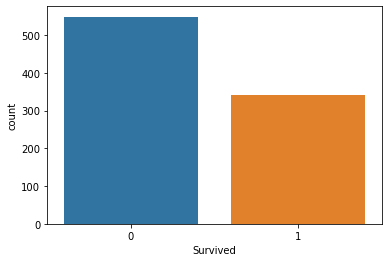

In [14]:
sns.countplot(data=train, x='Survived')
plt.show()

In [15]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

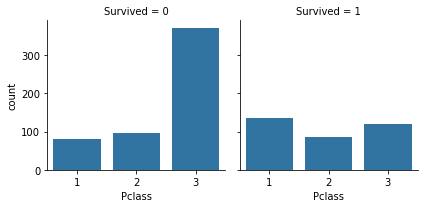

In [16]:
g = sns.FacetGrid(train, col='Survived')
g.map_dataframe(sns.countplot, x='Pclass')

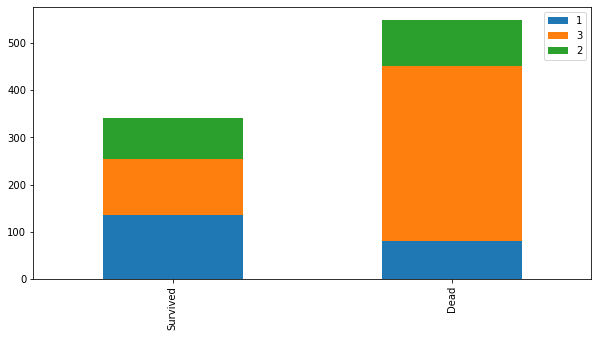

In [17]:
bar_chart('Pclass')

In [18]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

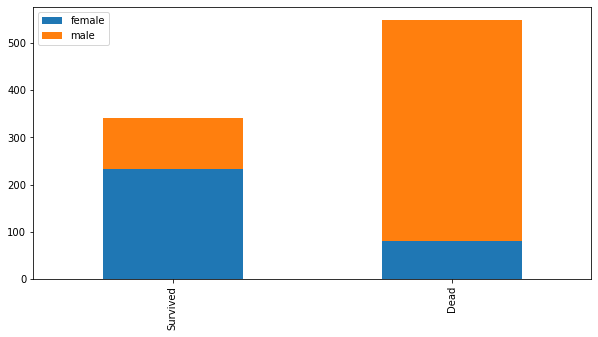

In [19]:
bar_chart('Sex')

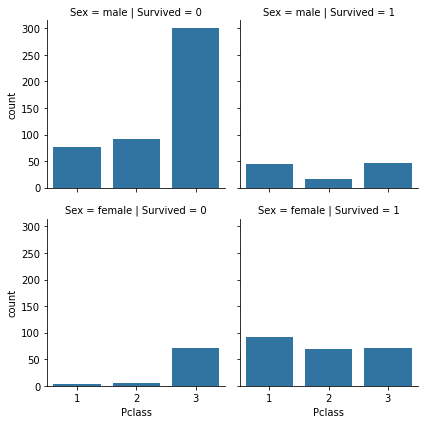

In [20]:
g = sns.FacetGrid(train, col='Survived', row='Sex')
g.map_dataframe(sns.countplot, x='Pclass')

In [21]:
train.Age.isnull().sum()

177

In [22]:
train.Age.mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Count'>

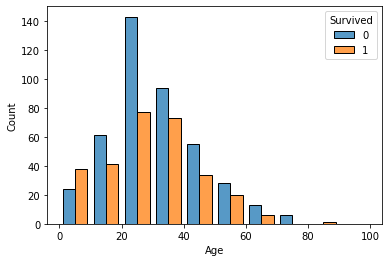

In [23]:
sns.histplot(data=train, x='Age', binrange=(0,100), bins=10,
            hue='Survived', multiple='dodge', shrink=.8)

In [24]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='SibSp', ylabel='Count'>

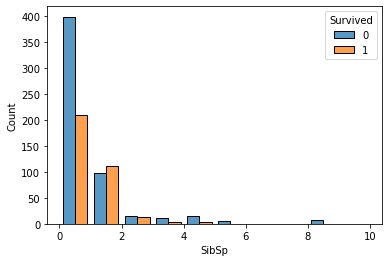

In [25]:
sns.histplot(data=train, x='SibSp', binrange=(0,10), bins=10,
            hue='Survived', multiple='dodge', shrink=.8)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

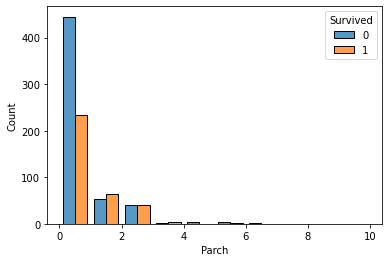

In [26]:
sns.histplot(data=train, x='Parch', binrange=(0,10), bins=10,
            hue='Survived', multiple='dodge', shrink=.8)

In [27]:
train[train.Fare == 0.0]['Fare'].count()

15

In [28]:
np.where(train.Fare == 0.0)

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
        815, 822], dtype=int64),)

In [29]:
na_list = list(np.where(train.Fare == 0.0)[0])

In [30]:
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [31]:
train['Fare'] = train['Fare'].replace(0.0, np.nan)
test['Fare'] = test['Fare'].replace(0.0, np.nan)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,NaN,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,NaN,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,NaN,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,NaN,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,NaN,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,NaN,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,NaN,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,NaN,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,NaN,NaN,S


In [32]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)
train.iloc[na_list]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,8.0500,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,61.9792,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,8.0500,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,15.0229,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,8.0500,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,15.0229,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,15.0229,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,15.0229,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,8.0500,NaN,S


In [33]:
train.Fare.describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [34]:
train['Fare_Category'] = pd.cut(train['Fare'], bins=[0.0, 7.9, 14.5, 31.0, 520],
                               labels=['Low', 'Mid', 'High_Mid', 'High'])

In [35]:
np.where(train.Fare_Category.isnull()==True)

(array([], dtype=int64),)

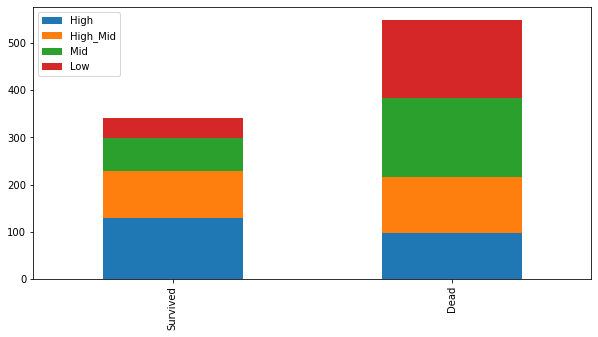

In [36]:
bar_chart('Fare_Category')

<AxesSubplot:xlabel='Fare_Category', ylabel='Count'>

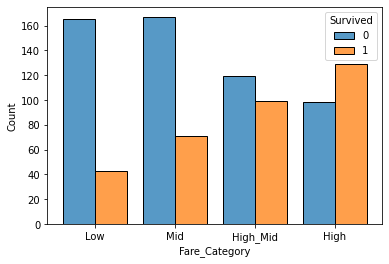

In [37]:
sns.histplot(data=train, x='Fare_Category', bins=10,
            hue='Survived', multiple='dodge', shrink=.8)

In [38]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]
train.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

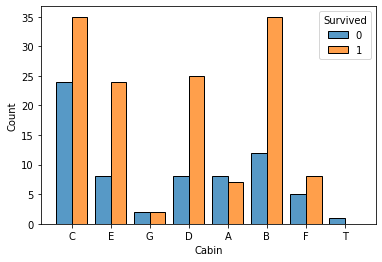

In [40]:
sns.histplot(data=train, x='Cabin', bins=10,
            hue='Survived', multiple='dodge', shrink=.8)

In [41]:
train.Cabin.isnull().sum()

687

In [42]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8,'D':1.2,
                'E':1.6, 'F':2, 'G':2.4,'T':2.8}
train.Cabin = train.Cabin.map(cabin_mapping)
test.Cabin = test.Cabin.map(cabin_mapping)

In [43]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [44]:
train.Cabin.isnull().sum(), test.Cabin.isnull().sum()

(0, 0)

In [45]:
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(2, 0)

In [46]:
train.Embarked.value_counts(), test.Embarked.value_counts()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [47]:
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')
train.Embarked.isnull().sum(), test.Embarked.isnull().sum()

(0, 0)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

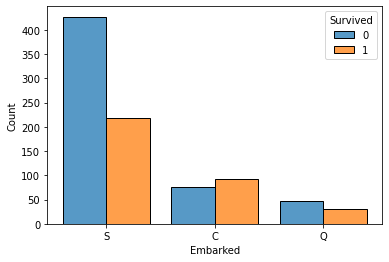

In [48]:
sns.histplot(data=train, x='Embarked', bins=10,
            hue='Survived', multiple='dodge', shrink=.8)

In [49]:
train['FamilySize'] = train.Parch + train.SibSp + 1
test['FamilySize'] = test.Parch + test.SibSp + 1

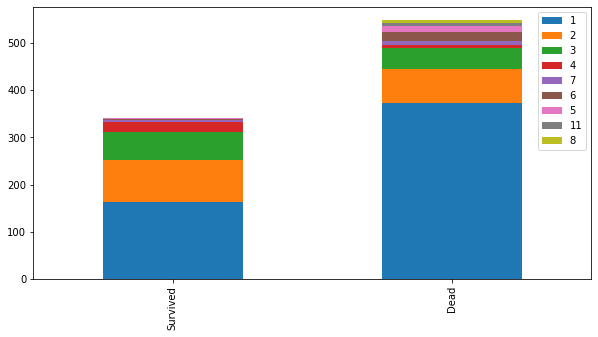

In [50]:
bar_chart('FamilySize')

In [51]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2,
                5:1.6, 6:2, 7:2.4,8:2.8, 9:3.2, 10:3.6, 11:4}
map_col('FamilySize', family_mapping)
train.FamilySize.value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

In [52]:
e_mapping = {'S':0, 'C':1, 'Q':2}
map_col('Embarked', e_mapping)

In [53]:
train.Embarked.value_counts(), test.Embarked.value_counts()

(0    646
 1    168
 2     77
 Name: Embarked, dtype: int64,
 0    270
 1    102
 2     46
 Name: Embarked, dtype: int64)

In [54]:
s_map = {'male':0, 'female':1}
map_col('Sex', s_map)

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,High,0.4
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0


In [56]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [57]:
train_test_data = [train, test]

In [58]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    

In [59]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [60]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3,
                'Rev':3, 'Col':3, 'Major':3, 'Mlle':3, 'Countess':3, 'Ms':3,
                'Lady':3, 'Jonkheer':3, 'Don':3, 'Dona':3, 'Mme':3, 'Capt':3, 'Sir':3}

map_col('Title', title_mapping)
train.Title.value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

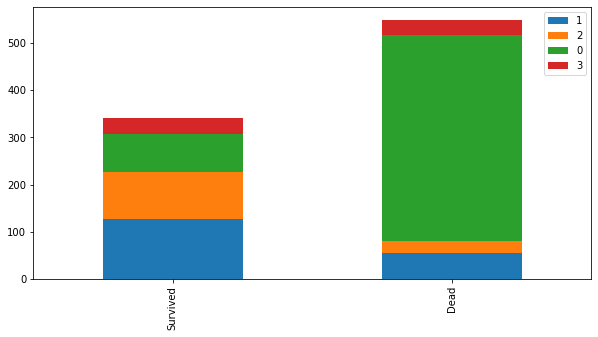

In [61]:
bar_chart('Title')

In [62]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [63]:
train.Age.isnull().sum(), test.Age.isnull().sum()

(177, 86)

In [64]:
train['AgeMedian'] = train.groupby('Title')['Age'].transform('median')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0


In [65]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0
6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,Mid,0.0,0,30.0
7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,High,0.0,0,30.0
8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,High_Mid,1.6,3,9.0
9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,Mid,0.8,2,35.0


In [66]:
train['Age_Category'] = pd.cut(train['Age'], bins=[0, 16, 26, 36, 62, 100],
                              labels=[0,1,2,3,4])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,Low,0.4,0,30.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,High,0.4,2,35.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,Mid,0.0,1,21.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,High,0.4,2,35.0,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,Mid,0.0,0,30.0,2


In [67]:
test['Age_Category'] = pd.cut(test['Age'], bins=[0, 16, 26, 36, 62, 100],
                              labels=[0,1,2,3,4])

In [68]:
train['Fare_Category'] = pd.cut(train['Fare'], bins=[0, 14, 30, 100, 1000],
                              labels=[0,1,2,3])
test['Fare_Category'] = pd.cut(test['Fare'], bins=[0, 14, 30, 100, 1000],
                              labels=[0,1,2,3])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,FamilySize,Title,AgeMedian,Age_Category
PassengerId,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4,0,30.0,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4,2,35.0,3
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,0,0.0,1,21.0,1
4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4,2,35.0,2
5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0,0,30.0,2


In [69]:
X_features = ['Pclass', 'Sex', 'Age_Category', 'Fare_Category',
             'Cabin', 'Embarked', 'Title', 'FamilySize']
X_train = train[X_features]
X_test = test[X_features]
Y_train = train['Survived']

In [70]:
X_train.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [71]:
X_test.isnull().sum()

Pclass           0
Sex              0
Age_Category     0
Fare_Category    0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [72]:
X_train.shape

(891, 8)

In [73]:
X_train.head()

,Pclass,Sex,Age_Category,Fare_Category,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,
1,3,0,1,0,2.0,0,0,0.4
2,1,1,3,2,0.8,1,2,0.4
3,3,1,1,0,2.0,0,1,0.0
4,1,1,2,2,0.8,0,2,0.4
5,3,0,2,0,2.0,0,0,0.0


In [74]:
Y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [76]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

def getScore(clf):
    score = cross_val_score(clf, X_train, Y_train,
                           cv=k_fold, n_jobs=1, scoring='accuracy')
    return score

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
scores = pd.DataFrame([
    getScore(KNeighborsClassifier(n_neighbors=13)),
    getScore(DecisionTreeClassifier(random_state=0)),
    getScore(RandomForestClassifier(n_estimators=13, random_state=0)),
    getScore(GaussianNB()),
    getScore(SVC(gamma='auto')),
    getScore(MLPClassifier(solver='sgd', activation='logistic',
                          hidden_layer_sizes=(48,16),
                          random_state=1, max_iter=200000))],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM', 'MLP_s'])


In [79]:
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090


In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [81]:
X = X_train.to_numpy()
Y = Y_train.to_numpy().reshape(-1, 1)

In [82]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)

accuracy_list = []

for train_index, test_index in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(units=48, input_dim=8, activation='relu'))
    model.add(Dense(units=24, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                 optimizer= 'adam', metrics=['accuracy'])
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    model.fit(Xtrain, Ytrain, epochs=100, batch_size=10, verbose=0)
    
    accuracy_list.append(model.evaluate(Xtest, Ytest)[1])


3/3 [==============================] - 0s 333us/step - loss: 0.4625 - accuracy: 0.8202


In [83]:
print(n_fold, '-fold accuracy:', accuracy_list)
print('\nAverage Accuracy:', np.array(accuracy_list).mean())

10 -fold accuracy: [0.8222222328186035, 0.8426966071128845, 0.7752808928489685, 0.8426966071128845, 0.8202247023582458, 0.8651685118675232, 0.7752808928489685, 0.7977527976036072, 0.7977527976036072, 0.8202247023582458]

Average Accuracy: 0.8159300744533539


In [84]:
scores.loc['MLP_tf'] = np.array(accuracy_list)
scores

,0,1,2,3,4,5,6,7,8,9
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090
MLP_tf,0.822222,0.842697,0.775281,0.842697,0.820225,0.865169,0.775281,0.797753,0.797753,0.820225


In [85]:
scores['Mean']= np.around(scores.mean(axis=1)*100, 2)
scores

,0,1,2,3,4,5,6,7,8,9,Mean
KNN,0.788889,0.786517,0.808989,0.831461,0.853933,0.808989,0.842697,0.797753,0.831461,0.853933,82.05
DT,0.777778,0.775281,0.786517,0.775281,0.876404,0.752809,0.808989,0.808989,0.741573,0.775281,78.79
RF,0.833333,0.786517,0.786517,0.808989,0.876404,0.808989,0.808989,0.786517,0.764045,0.775281,80.36
NB,0.855556,0.741573,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.853933,0.820225,78.67
SVM,0.833333,0.786517,0.820225,0.820225,0.842697,0.808989,0.831461,0.853933,0.842697,0.853933,82.94
MLP_s,0.566667,0.662921,0.651685,0.595506,0.696629,0.651685,0.595506,0.651685,0.561798,0.528090,61.62
MLP_tf,0.822222,0.842697,0.775281,0.842697,0.820225,0.865169,0.775281,0.797753,0.797753,0.820225,81.59


In [86]:
def getPredict(clf):
    global X_train, Y_train, X_test
    
    clf.fit(X_train, Y_train)
    return clf.predict(X_test)

In [87]:
prediction = pd.DataFrame({
    'KNN':getPredict(KNeighborsClassifier(n_neighbors=13)),
    'DT':getPredict(DecisionTreeClassifier()),
    'RF':getPredict(RandomForestClassifier(n_estimators=13)),
    'NB':getPredict(GaussianNB()),
    'SVM':getPredict(SVC(gamma='auto'))
})
prediction.head(20)

,KNN,DT,RF,NB,SVM
0,0,0,0,0,0
1,0,0,0,1,1
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,1,1,1
5,0,0,0,0,0
6,1,0,0,1,1
7,0,0,0,0,0
8,1,1,1,1,1
9,0,0,0,0,0


In [89]:
prediction['Survived_ML'] = (prediction.sum(axis=1) > 2) * 1
prediction.head(20)

,KNN,DT,RF,NB,SVM,Survived_ML
0,0,0,0,0,0,0
1,0,0,0,1,1,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,1,1,1,1,1
5,0,0,0,0,0,0
6,1,0,0,1,1,1
7,0,0,0,0,0,0
8,1,1,1,1,1,1
9,0,0,0,0,0,0


In [90]:
model = Sequential()
model.add(Dense(units=48, input_dim=8, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer= 'adam', metrics=['accuracy'])

model.fit(X, Y, epochs=5000, batch_size=10, verbose=0)

print('Train accuracy:', model.evaluate(X, Y)[1])
print('y_pred:', model.predict(X).reshape(-1,)[:30])

28/28 [==============================] - 0s 393us/step - loss: 0.2207 - accuracy: 0.9024
Train accuracy: 0.9023569226264954
y_pred: [2.65389860e-01 1.00000000e+00 4.99809295e-01 9.99963343e-01
 1.18104875e-01 8.00783634e-02 5.09876013e-03 7.60298499e-05
 9.99998927e-01 1.00000000e+00 9.93301034e-01 9.99835014e-01
 6.78504407e-02 0.00000000e+00 4.80863184e-01 9.99046683e-01
 0.00000000e+00 1.02907032e-01 7.22848713e-01 9.99985695e-01
 5.49631586e-05 7.91534066e-01 9.99993682e-01 2.87066221e-01
 3.70576978e-03 4.07606900e-01 8.49074423e-02 5.56126217e-13
 7.53574729e-01 1.18104875e-01]


In [91]:
prediction['MLP_TF'] = model.predict(X_test).reshape(-1,)
prediction['Survived_TF'] = (prediction['MLP_TF']>0.5).astype(int)
prediction.head(20)

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
0,0,0,0,0,0,0,8.007836e-02,0
1,0,0,0,1,1,0,3.670139e-05,0
2,0,1,0,0,0,0,2.880362e-09,0
3,0,0,0,0,0,0,1.181049e-01,0
4,0,1,1,1,1,1,1.000000e+00,1
5,0,0,0,0,0,0,1.778298e-01,0
6,1,0,0,1,1,1,7.340819e-03,0
7,0,0,0,0,0,0,8.257830e-08,0
8,1,1,1,1,1,1,9.987034e-01,1
9,0,0,0,0,0,0,1.574728e-05,0


In [92]:
(prediction.Survived_ML != prediction.Survived_TF).sum()

42

In [93]:
mis_idx = list(np.where(prediction.Survived_ML != prediction.Survived_TF)[0])
print(mis_idx)

[6, 23, 24, 36, 37, 39, 49, 64, 72, 73, 86, 87, 98, 138, 157, 165, 169, 196, 197, 199, 200, 206, 236, 264, 268, 280, 283, 284, 287, 291, 293, 305, 345, 367, 369, 376, 382, 383, 390, 403, 411, 412]


In [94]:
prediction.iloc[mis_idx,:]

,KNN,DT,RF,NB,SVM,Survived_ML,MLP_TF,Survived_TF
6,1,0,0,1,1,1,7.340819e-03,0
23,0,0,1,1,0,0,1.000000e+00,1
24,1,1,1,1,1,1,1.760945e-05,0
36,1,0,0,1,1,1,4.998093e-01,0
37,1,0,0,1,1,1,4.998093e-01,0
39,0,1,1,0,0,0,6.641075e-01,1
49,1,0,1,1,1,1,4.957332e-01,0
64,1,1,1,1,1,1,7.898358e-06,0
72,1,0,0,1,1,1,3.813554e-01,0
73,1,0,1,0,0,0,9.846151e-01,1


In [95]:
submission = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': prediction['Survived_ML']
})
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [96]:
submission.to_csv('submission.csv', index=False)